The datasets used in this session is obtained from (https://data.gov.gh/dataset/agricultural-production-estimates-1993-2017). The national wholesale price of selected commodities is the average of collated prices of each commodity in the regions.

There are a number of features in the datasets where it is not readily apparent what the encode or what their units are. Common definitions are:

* Region: regions in Ghana.
* Year: Years spanning between 2008 and 2012.
* Total_Rainfall (mm) : rainfall record in milliimeters (daily).
* Commodity: variety of farm produce.
* Weight(Kg): weight of produce in 100kg

The objective of this hands-on practicals is to build a regresssion model to predict prices for selected commodities in Ghana.

In [1]:
# import relevant libraries to help with loading the data and plotting
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
from collections import Counter
rcParams['figure.figsize'] = 8,8
%matplotlib inline

### LOADING DATA

In [2]:
rainfall = pd.read_csv('/home/francisanokye/AIMS/Data_Bank/RAINFALL.csv')
temperature = pd.read_csv('/home/francisanokye/AIMS/Data_Bank/Monthly_Average_Temperature_in_Ghana.csv')
prices = pd.read_csv('/home/francisanokye/AIMS/Data_Bank/NATIONAL_WHOLESALE_PRICE_OF_SELECTED_COMMODITIES_1970_2017.csv',encoding='latin-1')

In [3]:
# checking the total number of rows and columns for the rainfall data, and print out the first 5 rows
print(rainfall.shape)
rainfall.head()

(100, 3)


,YEAR,REGION,TOTAL RAINFALL(MM)
0,2008,WESTERN,1518
1,2008,CENTRAL,1361
2,2008,GREATER ACCRA,914
3,2008,VOLTA,1436
4,2008,EASTERN,1454


In [4]:
# checking data information
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
YEAR                  100 non-null int64
REGION                100 non-null object
TOTAL RAINFALL(MM)    100 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [5]:
# renaming columns for rainfall 
col = {'YEAR':'Year','REGION':'Region','TOTAL RAINFALL(MM)':'Total_Rainfall (mm)'}
rainfall.rename(columns=col,inplace=True)
rainfall.head()

,Year,Region,Total_Rainfall (mm)
0,2008,WESTERN,1518
1,2008,CENTRAL,1361
2,2008,GREATER ACCRA,914
3,2008,VOLTA,1436
4,2008,EASTERN,1454


In [6]:
# check the total number of rows and columns for the temperature data, and print out the first 5 rows
print(temperature.shape)
temperature.head()

(1344, 4)


,Temperature (C),Year,Month,Country
0,25.326168,1901,1,GHA
1,28.642990,1901,2,GHA
2,28.397196,1901,3,GHA
3,28.612148,1901,4,GHA
4,27.476635,1901,5,GHA


In [7]:
# checking data information
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 4 columns):
Temperature (C)    1344 non-null float64
	Year              1344 non-null int64
 Month             1344 non-null int64
 Country           1344 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 42.1+ KB


In [8]:
# remove unwanted whitespaces in the column names
temperature.columns = temperature.columns.str.strip()
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 4 columns):
Temperature (C)    1344 non-null float64
Year               1344 non-null int64
Month              1344 non-null int64
Country            1344 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 42.1+ KB


In [9]:
# checking the total number of rows and columns for the prices data, and print out the first 5 rows
print(prices.shape)
prices.head()

(3216, 5)


,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,1970,JANUARY,MAIZE,100,0.0011
1,1970,FEBRUARY,MAIZE,100,0.0012
2,1970,MARCH,MAIZE,100,0.0012
3,1970,APRIL,MAIZE,100,0.0013
4,1970,MAY,MAIZE,100,0.0014


In [10]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 5 columns):
YEAR                  3216 non-null int64
MONTH                 3216 non-null object
COMMODITY             3216 non-null object
WEIGHT, KG PER BAG    3216 non-null int64
 PRICE, ¢ GH          3216 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 125.7+ KB


In [11]:
# remove unwanted whitespace in the price column
prices.columns = prices.columns.str.strip()
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 5 columns):
YEAR                  3216 non-null int64
MONTH                 3216 non-null object
COMMODITY             3216 non-null object
WEIGHT, KG PER BAG    3216 non-null int64
PRICE, ¢ GH           3216 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 125.7+ KB


In [12]:
# Rename the prices columns
"""
prices.columns = prices.columns.lower()....this does same work as below
"""
K = {'YEAR':'Year', 
     'MONTH':'Month', 
     'COMMODITY':'Commodity', 
     'WEIGHT, KG PER BAG':'Weight(Kg)',
     "PRICE, ¢ GH":"Prices(GH¢)"
    }
prices.rename(columns=K,inplace=True)
prices.head()

,Year,Month,Commodity,Weight(Kg),Prices(GH¢)
0,1970,JANUARY,MAIZE,100,0.0011
1,1970,FEBRUARY,MAIZE,100,0.0012
2,1970,MARCH,MAIZE,100,0.0012
3,1970,APRIL,MAIZE,100,0.0013
4,1970,MAY,MAIZE,100,0.0014


In [13]:
# The month column for the prices data are in strings so i would like to convert them into numbers 
# to match that in the temperature data
"""
prices['Month'] = prices['Month'].replace({'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,'JULY':7,
             'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12})
"""
M = {'NOVEMBER': 11,
     'SEPTEMBER': 9, 
     'OCTOBER':10,
     'AUGUST':8, 
     'APRIL':4,  
     'MARCH':3 ,
     'MAY':5,        
     'DECEMBER':12,
     'JULY':7,  
     'FEBRUARY':2, 
     'JANUARY':1 , 
     'JUNE':6
    }
prices['Month'] = prices['Month'].map(M)

In [14]:
# checking out on the changes made so far on prices
prices.head()

,Year,Month,Commodity,Weight(Kg),Prices(GH¢)
0,1970,1,MAIZE,100,0.0011
1,1970,2,MAIZE,100,0.0012
2,1970,3,MAIZE,100,0.0012
3,1970,4,MAIZE,100,0.0013
4,1970,5,MAIZE,100,0.0014


In [77]:
# create a date column and set as index to merge the data on
# prices['Date'] = pd.to_datetime(prices[['Year','Month']].assign(Day=1))
# prices = prices.set_index('Date')
# prices.head()

### MERGING DATA

In [15]:
# merging the rainfall and temperature data on the year column where the data intersect, and we call it df
df = pd.merge(rainfall,temperature,on='Year',how='inner')
print(df.shape)
df.head()

(600, 6)


,Year,Region,Total_Rainfall (mm),Temperature (C),Month,Country
0,2008,WESTERN,1518,25.227102,1,GHA
1,2008,WESTERN,1518,28.320560,2,GHA
2,2008,WESTERN,1518,29.402805,3,GHA
3,2008,WESTERN,1518,29.757010,4,GHA
4,2008,WESTERN,1518,28.635513,5,GHA


In [16]:
# now we merge the df data just created from rainfall and temoerature with prices on both year and month
DF = pd.merge(df,prices,on=['Year','Month'],how='inner')
print(DF.shape)
DF.head()

(3600, 9)


,Year,Region,Total_Rainfall (mm),Temperature (C),Month,Country,Commodity,Weight(Kg),Prices(GH¢)
0,2008,WESTERN,1518,25.227102,1,GHA,MAIZE,100,13.694
1,2008,WESTERN,1518,25.227102,1,GHA,MILLET,93,0.900
2,2008,WESTERN,1518,25.227102,1,GHA,LOCAL RICE,100,16.170
3,2008,WESTERN,1518,25.227102,1,GHA,SORGHUM,109,493.150
4,2008,WESTERN,1518,25.227102,1,GHA,YAM,250,84.270


In [17]:
# check for missing or null values in the merged data called DF
DF.isnull().sum()

Year                   0
Region                 0
Total_Rainfall (mm)    0
Temperature (C)        0
Month                  0
Country                0
Commodity              0
Weight(Kg)             0
Prices(GH¢)            0
dtype: int64

In [18]:
# information about our data
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600 entries, 0 to 3599
Data columns (total 9 columns):
Year                   3600 non-null int64
Region                 3600 non-null object
Total_Rainfall (mm)    3600 non-null int64
Temperature (C)        3600 non-null float64
Month                  3600 non-null int64
Country                3600 non-null object
Commodity              3600 non-null object
Weight(Kg)             3600 non-null int64
Prices(GH¢)            3600 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 281.2+ KB


In [19]:
# the data under consideration is fron a single country, ie Ghana
DF.Country.unique()

array(['GHA'], dtype=object)

In [20]:
# data is gathered from 10 different regions in Ghana
DF.Region.unique()

array(['WESTERN', 'CENTRAL', 'GREATER ACCRA', 'VOLTA', 'EASTERN',
       'ASHANTI', 'BRONG AHAFO', 'NORTHERN', 'UPPER EAST', 'UPPER WEST'],
      dtype=object)

In [21]:
Counter(DF['Region'])

Counter({'WESTERN': 360,
         'CENTRAL': 360,
         'GREATER ACCRA': 360,
         'VOLTA': 360,
         'EASTERN': 360,
         'ASHANTI': 360,
         'BRONG AHAFO': 360,
         'NORTHERN': 360,
         'UPPER EAST': 360,
         'UPPER WEST': 360})

In [22]:
# the merged data spans only period from 2008 - 2012
DF.Year.unique()

array([2008, 2009, 2010, 2011, 2012])

In [23]:
Counter(DF['Year'])

Counter({2008: 720, 2009: 720, 2010: 720, 2011: 720, 2012: 720})

In [24]:
# descriptive statistics of the merged data
DF.describe()

,Year,Total_Rainfall (mm),Temperature (C),Month,Weight(Kg),Prices(GH¢)
count,3600.00000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,2010.00000,1139.560000,27.612726,6.500000,123.833333,106.107817
std,1.41441,258.574049,1.470138,3.452532,56.727707,187.239546
min,2008.00000,523.000000,25.227102,1.000000,91.000000,0.007000
25%,2009.00000,956.000000,26.371592,3.750000,93.000000,14.154750
50%,2010.00000,1170.500000,27.184251,6.500000,100.000000,33.201500
75%,2011.00000,1361.000000,28.972586,9.250000,109.000000,94.855000
max,2012.00000,1749.000000,30.795456,12.000000,250.000000,920.550000


/home/francisanokye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/francisanokye/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/francisanokye/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axi

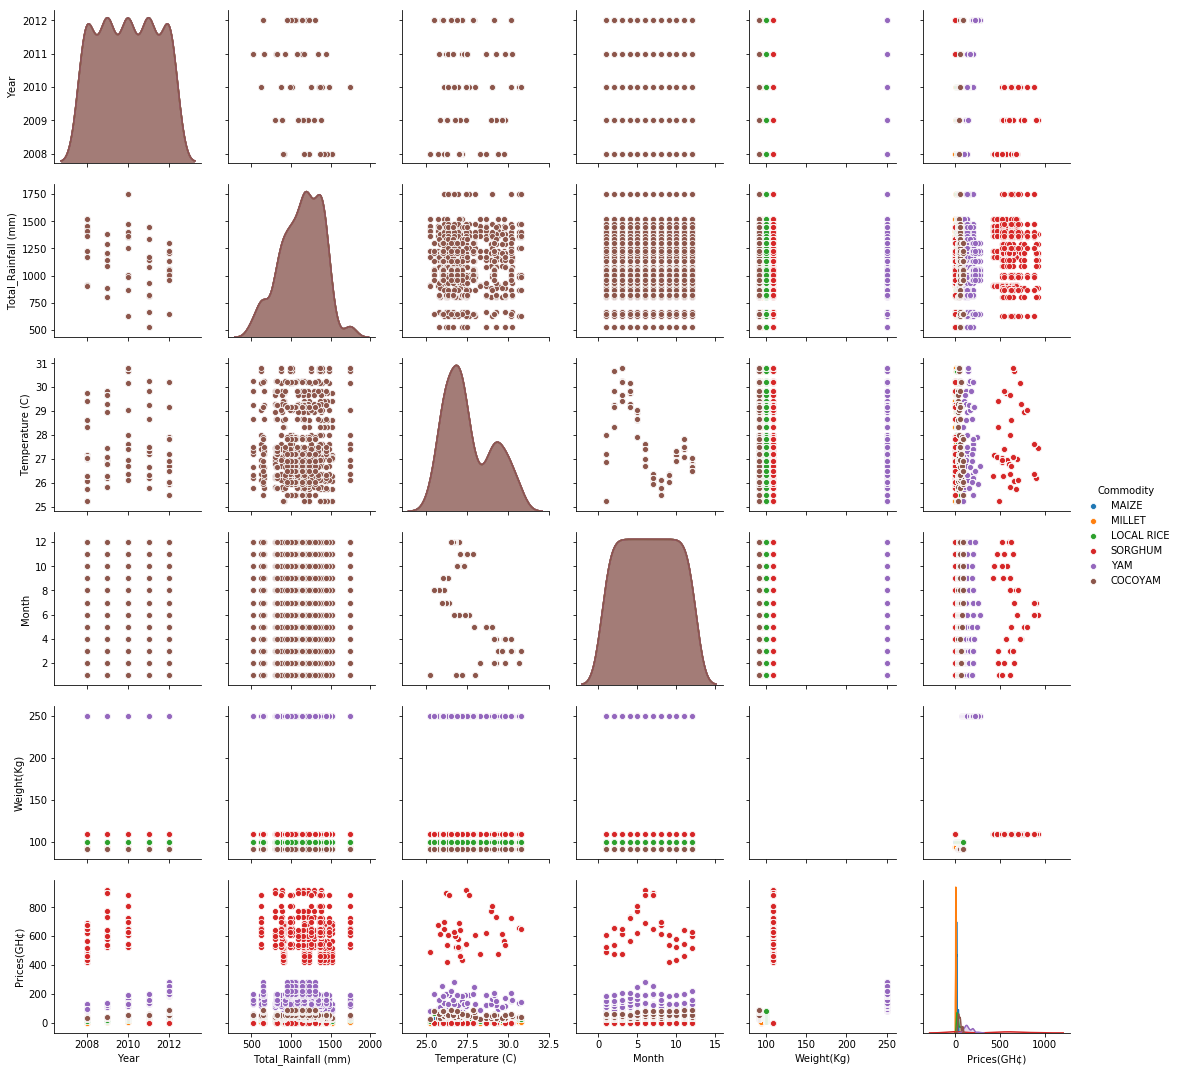

In [26]:
# a plot to visualize the entire data and relate the individual variables with one another setting hue to commodity
sb.pairplot(DF,hue='Commodity')

In [27]:
# Since the country is just Ghana, it does not offer any more information, hence, we drop it
DF.drop(columns='Country',axis=1,inplace=True)
DF.head()

,Year,Region,Total_Rainfall (mm),Temperature (C),Month,Commodity,Weight(Kg),Prices(GH¢)
0,2008,WESTERN,1518,25.227102,1,MAIZE,100,13.694
1,2008,WESTERN,1518,25.227102,1,MILLET,93,0.900
2,2008,WESTERN,1518,25.227102,1,LOCAL RICE,100,16.170
3,2008,WESTERN,1518,25.227102,1,SORGHUM,109,493.150
4,2008,WESTERN,1518,25.227102,1,YAM,250,84.270


Year


/home/francisanokye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


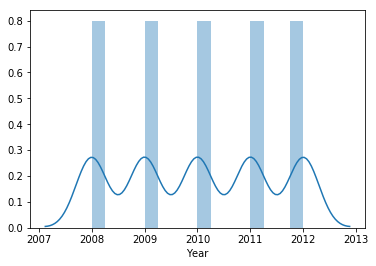

Total_Rainfall (mm)


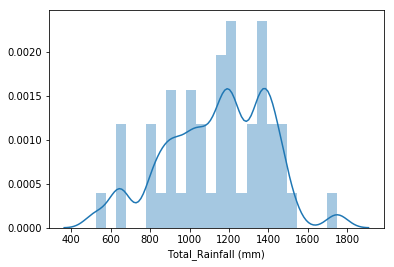

Temperature (C)


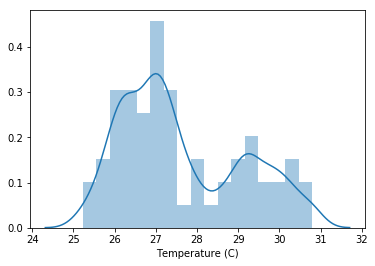

Month


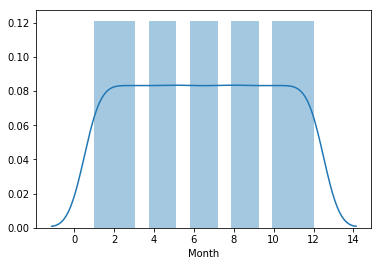

Weight(Kg)


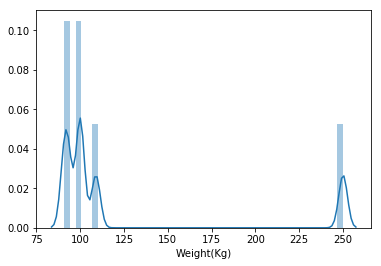

Prices(GH¢)


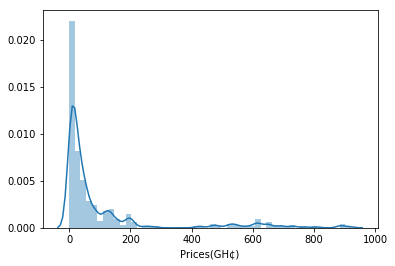

In [91]:
# we plot to visualize the numeric columns
C = DF.columns
for k in C:
    if DF[k].dtype != 'object':
        print(k)
        sb.distplot(DF[k],hist=True)
        plt.xlabel(k)
        plt.show()
    

Region


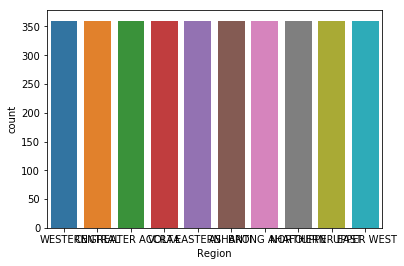

Commodity


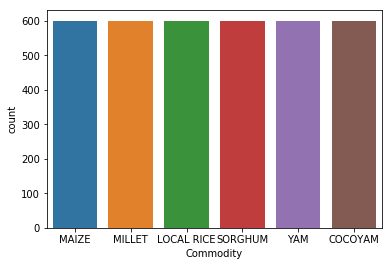

In [92]:
# we plot to visualize the categorical columns
for d in C:
    if DF[d].dtype == 'object':
        print(d)
        sb.countplot(DF[d])
        plt.show()

In [93]:
# the commodity variable consists of six different varieties
Counter(DF.Commodity)

Counter({'MAIZE': 600,
         'MILLET': 600,
         'LOCAL RICE': 600,
         'SORGHUM': 600,
         'YAM': 600,
         'COCOYAM': 600})

In [94]:
DF['Weight(Kg)'].max()

250

In [95]:
DF['Weight(Kg)'].min()

91

In [96]:
DF['Weight(Kg)'].mean()

123.83333333333333

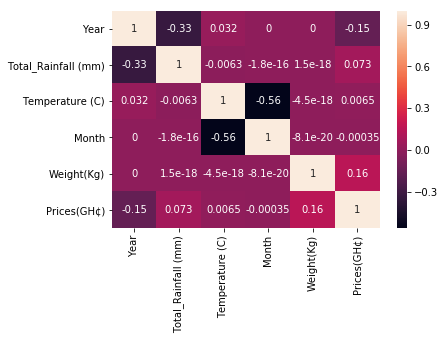

In [28]:
# correlation plot to visualize how the variables relate with one another
cor = DF.corr()
sb.heatmap(cor,xticklabels= cor.columns.values,yticklabels=cor.columns.values,annot=True,annot_kws={'size':10})
plt.show()

In [29]:
cor

,Year,Total_Rainfall (mm),Temperature (C),Month,Weight(Kg),Prices(GH¢)
Year,1.000000,-3.266707e-01,3.237384e-02,0.000000e+00,0.000000e+00,-0.151903
Total_Rainfall (mm),-0.326671,1.000000e+00,-6.325596e-03,-1.760703e-16,1.478658e-18,0.072726
Temperature (C),0.032374,-6.325596e-03,1.000000e+00,-5.572156e-01,-4.474215e-18,0.006526
Month,0.000000,-1.760703e-16,-5.572156e-01,1.000000e+00,-8.064276e-20,-0.000349
Weight(Kg),0.000000,1.478658e-18,-4.474215e-18,-8.064276e-20,1.000000e+00,0.158063
Prices(GH¢),-0.151903,7.272607e-02,6.526127e-03,-3.492945e-04,1.580630e-01,1.000000


In [30]:
X = DF.drop(columns='Prices(GH¢)',axis=1) # drop the target variable 
print(X.shape)
y = DF['Prices(GH¢)'] # drop the other variables and leave out the target variable which is prices
print(y.shape)

(3600, 7)
(3600,)


In [31]:
# encoding the columns with sublevels into numeric using scikit-learn labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Converting categorical columns into numeric
X['Commodity'] = le.fit(X['Commodity']).transform(X['Commodity'])
X['Region']    = le.fit(X['Region']).transform(X['Region'])

# year column treated as numeric but in fact it's a class
X['Year']      = le.fit(X['Year']).transform(X['Year']) 
X.shape

(3600, 7)

In [32]:
# importing relevant libraries from scikit-learn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

# spliting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2700, 7)
(2700,)
(900, 7)
(900,)


In [33]:
# normalizing data using the standard scaler since the different variables have different scales of measurement
columns_to_scale = X.columns.tolist()
columns_to_scale = [x for x in columns_to_scale if x != 'Prices(GH¢)']
# print(columns_to_scale)

std_scaler = StandardScaler().fit(X_train[columns_to_scale])
X_train[columns_to_scale] = std_scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = std_scaler.transform(X_test[columns_to_scale])

/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/home/francisanokye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/francisanokye/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### BUILDING LINEAR  MODELS WITH CROSS VALIDATION

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import time

I will now explore a number of regression algorithms. Their performance when compared to each other may give a first indication on what the most promising algorithms for the dataset are. I can then focus on these to furtehr optimize the hyperparameters.

For now, I include the following algorithms:

* linear regression (<a href="http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares">Sklearn</a>)
* linear regression with L2 regularization (<a href="http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression">Sklearn</a>)
* polynomial regression (<a href="http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions">Sklearn</a>)
* random forest regression (<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor">Sklearn</a>)
* gradient boosted tree regression (<a href="http://scikit-learn.org/stable/modules/ensemble.html#regression">Sklearn</a>)
* nearest neighbor regression (<a href="http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression">Sklearn</a>)
* support vector regression (<a href="http://scikit-learn.org/stable/modules/svm.html#regression">Sklearn</a>)

All algorithm are first run using their default values.

#### Linear Regression

In [38]:
lin = LinearRegression()
before = time.time()
linscores = cross_val_score(lin,X_train,y_train,cv=10,scoring='r2')
print("The training accuracy of linear regression is %0.2f  (+/- %0.2f)" % (linscores.mean(), linscores.std() * 2))
after = time.time()
print('Time taken to execute algorithm: {:5.2f} s'.format(after - before))

The training accuracy of linear regression is 0.20  (+/- 0.07)
Time taken to execute algorithm:  0.11 s


#### Polynomial Regression

In [39]:
before = time.time()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
linpoly = LinearRegression()
linpolyscores = cross_val_score(linpoly,X_train_poly,y_train,cv=10,scoring='r2')
print("The training accuracy of polynomial linear regression is %0.2f  (+/- %0.2f)" %(linpolyscores.mean(), linpolyscores.std()*2))
after = time.time()
print('Time taken to execute algorithm: {:5.2f} s'.format(after - before))

The training accuracy of polynomial linear regression is 0.65  (+/- 0.08)
Time taken to execute algorithm:  0.08 s


#### GradientBoostingRegressor

In [40]:
GBR = GradientBoostingRegressor()
before = time.time()
gbrscores = cross_val_score(GBR,X_train,y_train,cv=10,scoring='r2')
print("The training accuracy of gradientboostingregressor is %0.2f  (+/- %0.2f)" %(gbrscores.mean(), gbrscores.std()*2))
after = time.time()
print('Time taken to execute algorithm: {:5.2f} s'.format(after - before))

The training accuracy of gradientboostingregressor is 0.98  (+/- 0.01)
Time taken to execute algorithm:  1.32 s


#### Ridge Regression (Linear least squares with l2 regularization)

In [41]:
ridge = Ridge(alpha=.8)
before = time.time()
ridgescores = cross_val_score(ridge,X_train,y_train,cv=10,scoring='r2')
print("The accuracy for the ridge regrssion is %.2f (+/- %.2f)" %(ridgescores.mean(),ridgescores.std()*2))
after = time.time()
print('Time taken to execute algorithm is: {:5.2f} s'.format(after - before))                  

The accuracy for the ridge regrssion is 0.20 (+/- 0.07)
Time taken to execute algorithm is:  0.33 s


#### RandomForestRegressor

In [42]:
randforreg = RandomForestRegressor()
before = time.time()
ranrgscores = cross_val_score(randforreg,X_train,y_train,cv=10,scoring='r2')
print("The accuracy for the random forest regressor is %.2f (+/- %.2f)" % (ranrgscores.mean(),ranrgscores.std()*2))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))

/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/francisano

The accuracy for the random forest regressor is 1.00 (+/- 0.00)
Time taken to execute algorithm is :  0.62 s


/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Support vector regressor (SVR)

In [52]:
kernel = ['linear', 'poly', 'rbf']
for i in kernel:
    print("when Kernel is {}".format(i))
    svr = SVR(kernel=i,C=1)
    before = time.time()
    svrscores = cross_val_score(svr, X_train,y_train,cv=10,scoring='r2')
    print("The accuracy for the support vector regressor is %.2f (+/- %.2f)" % (svrscores.mean(),svrscores.std()*2))
    after = time.time()
    print("Time taken to execute algorithm is {:5.2f}".format(after - before))
    print("***" * 50)

when Kernel is linear
The accuracy for the support vector regressor is -0.18 (+/- 0.08)
Time taken to execute algorithm is  2.64
******************************************************************************************************************************************************
when Kernel is poly


/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/francisanokye/anaconda3/lib/

The accuracy for the support vector regressor is -0.16 (+/- 0.08)
Time taken to execute algorithm is  2.81
******************************************************************************************************************************************************
when Kernel is rbf


/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/francisanokye/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/francisanokye/anaconda3/lib/

The accuracy for the support vector regressor is -0.10 (+/- 0.06)
Time taken to execute algorithm is  4.06
******************************************************************************************************************************************************


## KNeighborsRegressor

In [53]:
knr = KNeighborsRegressor(n_neighbors=5,n_jobs=-1,weights='uniform')
before = time.time()
knrscores = cross_val_score(knr,X_train,y_train,cv=10,scoring='r2')
print("The accuracy for the nearest neighbor regressor is %.2f (+/- %.2f)" %(knrscores.mean(),knrscores.std()*2))
after = time.time()
print("Time taken to execute algorithm is {:5.2f}".format(after - before))

The accuracy for the nearest neighbor regressor is 0.72 (+/- 0.07)
Time taken to execute algorithm is  2.13


The **RandomForestRegressor** has performed the best with perfect accuracy followed by GradientBoostingRegressor and KNeighborsRegressor,

The GradientBoostingRegressor has been the recent favorite among many machine-learning competitions - it performed relatively better compared to other algorithms except for RandomForestRegressor. Obviously, I did not perform any parameter tuning, but rather used the default values. Now let's see if I can increase the performance by tuning some of the main parameters:

In [132]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
before = time.time()
tuned_parameters = [{'n_estimators':[100,200,300,400,500],
                     'max_depth':[3,5,7,9,11],
                     'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}]
gradtuned = GradientBoostingRegressor(loss='ls',random_state=0)
estgrad = GridSearchCV(gradtuned,tuned_parameters,cv=10,n_jobs=-1)
estgrad.fit(X_train,y_train)

means = estgrad.cv_results_['mean_test_score']
stds = estgrad.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, estgrad.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    
after = time.time()
print('Exec. time: {:5.2f} s'.format(after-before))

0.980 (+/-0.009) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.986 (+/-0.006) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.988 (+/-0.006) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.990 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
0.991 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.999 (+/-0.000) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
1.000 (+/-0.000) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
1.000 (+/-0.000) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
1.000 (+/-0.000) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
1.000 (+/-0.000) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
1.000 (+/-0.000) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
1.000 (+/-0.000) for {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
1.000 (+/-0.000) for {'learn

Upon the tuning of the hyperparameters, it is obvious that the gradientboosting regressor has seen tremendous improvement.

In [74]:
GBRfinal = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=200)
before = time.time()
GBRscores = cross_val_score(GBRfinal,X_train,y_train,cv=10,scoring='r2')
print("The training accuracy of gradientboostingregressor is %0.2f  (+/- %0.2f)" %(GBRscores.mean(), GBRscores.std()*2))
after = time.time()
print('Time taken to execute algorithm: {:5.2f} s'.format(after - before))

The training accuracy of gradientboostingregressor is 1.00  (+/- 0.00)
Time taken to execute algorithm:  4.66 s


It is clearly shown from our built models that GradientBoostingRegressor and RandomForestRegressor have both produced r2_scores of 1 (coefficient of determination), which implies that these models best explain the variability in the data.